In [2]:
import networkx as nx

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import community

import community as community_louvain



c:\Users\Dell 5520\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df_original = pd.read_csv('data/primaryschool.csv', header=None, delimiter='\t', names = ['time', 'u', 'v', 'grade_u', 'grade_v'])
print(df_original.head())

metadata = pd.read_csv('data/metadata.txt', header=None, delimiter='\t', names = ['id', 'grade', 'gender'])
print(metadata.head())

    time     u     v grade_u grade_v
0  31220  1558  1567      3B      3B
1  31220  1560  1570      3B      3B
2  31220  1567  1574      3B      3B
3  31220  1632  1818      4B      4B
4  31220  1632  1866      4B      4B
     id grade gender
0  1426    5B      M
1  1427    5B      F
2  1428    5B      M
3  1429    5B      F
4  1430    5B      M


In [4]:
# Sort dataframe by source, target, and timestamp
df_original = df_original.sort_values(by=['u', 'v', 'time'])

# Initialize an empty list to store the results
df = []

# Iterate through the dataframe to calculate weights
for (u, v), group in df_original.groupby(['u', 'v']):
    timestamps = group['time'].tolist()
    weight = 1
    first_time = timestamps[0]
    for i in range(1, len(timestamps)):
        if timestamps[i] == timestamps[i-1] + 20:
            weight += 1
        else:
            df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})
            weight = 1
            first_time = timestamps[i]
    df.append({'u': u, 'v': v, 'weight': weight, 'time': first_time})

# Create a new dataframe from the result
df = pd.DataFrame(df)

print(df.head(10))

      u     v  weight   time
0  1426  1427       1  36740
1  1426  1427       2  36940
2  1426  1427       2  39640
3  1426  1427       2  52820
4  1426  1427       1  54760
5  1426  1427       2  56580
6  1426  1427       1  60680
7  1426  1427       2  61080
8  1426  1427       1  61160
9  1426  1427       2  61320


In [5]:
grade_dict = {"1A": "red", "1B": "red", "2A": "orange", "2B": "orange", "3A": "gray", "3B": "gray", "4A": "cyan", "4B": "cyan", "5A": "blue", "5B": "blue", "Teachers": "black"}
grade_dict_more = {"1A": "firebrick", "1B": "red", "2A": "orange", "2B": "sandybrown", "3A": "slategray", "3B": "gray", "4A": "darkturquoise", "4B": "cyan", "5A": "cornflowerblue", "5B": "blue", "Teachers": "black"}

node_grade = {}
node_gender = {}
for _, row in metadata.iterrows():
    node_grade[row['id']] = row['grade']
    node_gender[row['id']] = row['gender']

gender_dict = {"M": "blue", "F": "magenta", "Unknown": "gray"}

In [6]:
G = nx.Graph()
for _, row in metadata.iterrows():
    if row['grade'] != "Teachers":
        G.add_node(row['id'], color=grade_dict_more[row['grade']])

for _, edge in df.iterrows():
    if node_grade[edge['u']] != "Teachers" and node_grade[edge['v']] != "Teachers":
        G.add_edge(edge['u'], edge['v'], weight=edge['weight'], time=edge['time'])


In [7]:
group = {grade: metadata[metadata['grade'] == grade]['id'].tolist() for grade in metadata['grade'].unique()}
group = {'1A': group['1A'], '1B': group['1B'], '5A': group['5A'], '5B': group['5B']}

In [8]:
d1_min = 31220
d1_max = 62300

d2_min = 117240
d2_max = 148120

In [9]:
first_break = {"1A": "10:40:00", "1B": "10:10:00", "5A": "09:45:00", "5B": "09:45:00"}


## Task 7

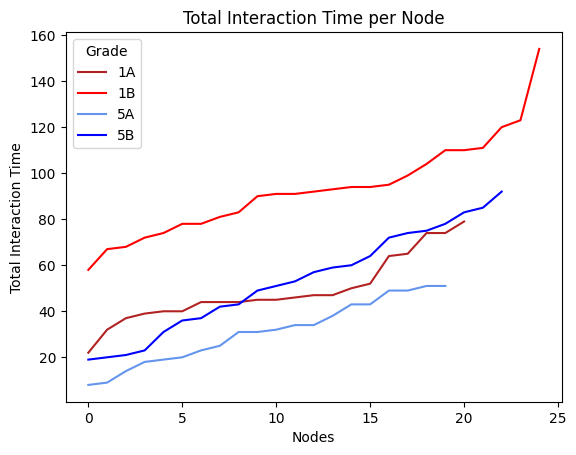

In [22]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    # for each node calculate total intraction time
    total_interaction_time = [df_filtered[df_filtered['u'] == node]['weight'].sum()+df_filtered[df_filtered['v'] == node]['weight'].sum() for node in nodes]
    # remove nodes with no interaction
    total_interaction_time = [x for x in total_interaction_time if x != 0]

    # plot histogram
    plt.plot(sorted(total_interaction_time), label=grade, color=grade_dict_more[grade])
    plt.xlabel('Nodes')
    plt.ylabel('Total Interaction Time')
    plt.title('Total Interaction Time per Node')
    plt.legend(title='Grade')
plt.show()

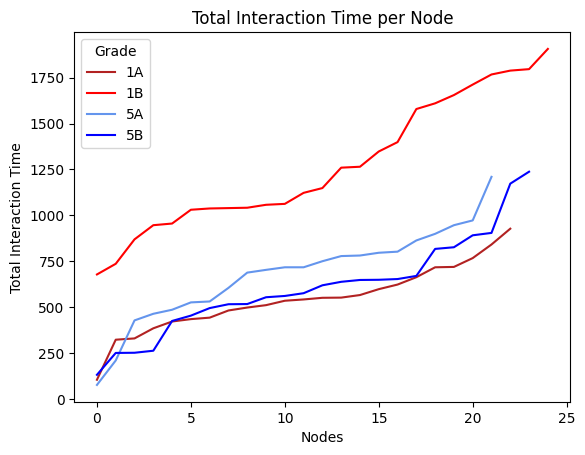

In [23]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & ((df['time'] >= time_to_timestamp("14:00:00")) | (df['time'] <= time_to_timestamp("12:00:00")))]
    # for each node calculate total intraction time
    total_interaction_time = [df_filtered[df_filtered['u'] == node]['weight'].sum()+df_filtered[df_filtered['v'] == node]['weight'].sum() for node in nodes]
    # remove nodes with no interaction
    total_interaction_time = [x for x in total_interaction_time if x != 0]

    # plot histogram
    plt.plot(sorted(total_interaction_time), label=grade, color=grade_dict_more[grade])
    plt.xlabel('Nodes')
    plt.ylabel('Total Interaction Time')
    plt.title('Total Interaction Time per Node')
    plt.legend(title='Grade')
plt.show()

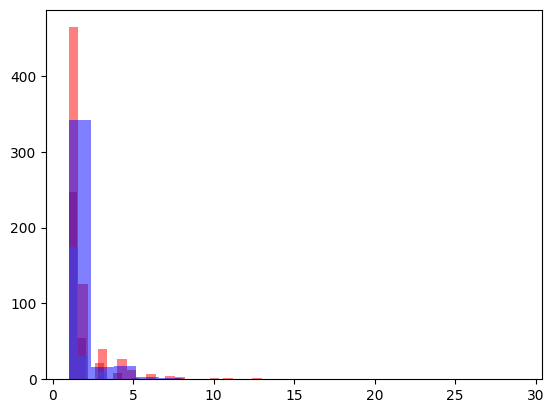

In [24]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    # plot the distributin of interaction time 'weight'
    plt.hist(df_filtered['weight'], bins=20, alpha=0.5, label=grade, color=grade_dict_more[grade])

Aggregated weight values. Aggregate weights for a fixed edge

c:\Users\Dell 5520\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


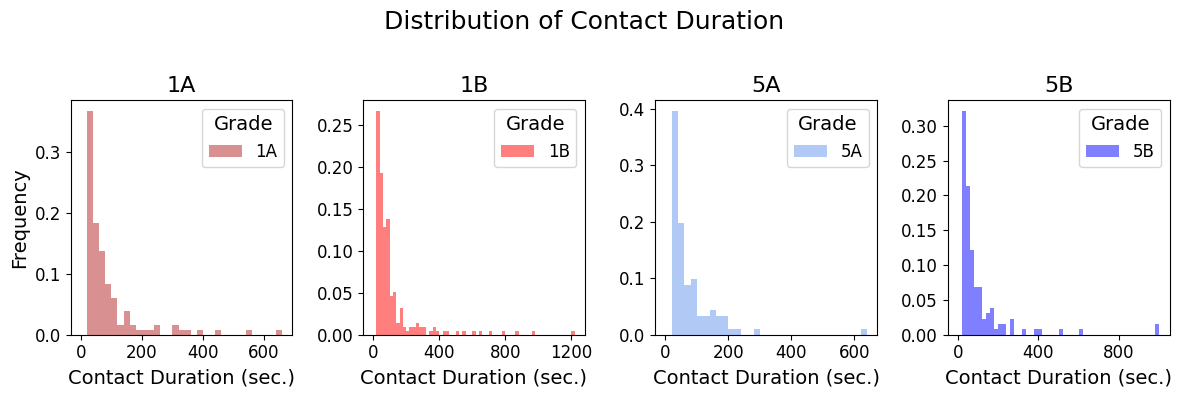

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming necessary data is available: group, grade_dict_more, df, time_to_timestamp, etc.

fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Increased figure size for better visibility in reports

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    df_filtered = df_filtered.groupby(['u', 'v']).sum().reset_index()
    df_filtered['weight'] = df_filtered['weight']
    # Plot the histogram
    bin_width = 1
    bins = np.arange(0, df_filtered['weight'].max() + bin_width, bin_width)
    ax.hist(
        df_filtered['weight'], 
        bins=bins, 
        alpha=0.5, 
        label=grade, 
        color=grade_dict_more[grade], 
        density=True
    )
    ax.set_xlabel('Contact Duration (sec.)', fontsize=14)  # Increased font size for x-axis label
    if ax == axes[0]:  # Only the first subplot needs a y-axis label
        ax.set_ylabel('Frequency', fontsize=14)  # Increased font size for y-axis label
    ax.set_title(f'{grade}', fontsize=16)  # Larger font for subplot titles
    ax.tick_params(axis='both', which='major', labelsize=12)  # Increased tick label sizes
    ax.legend(title='Grade', fontsize=12, title_fontsize=14)  # Adjusted legend font sizes

    # change values of xticks to be 20 times the current value 
    ax.set_xticklabels([int(label) * 20 for label in ax.get_xticks()])
    

# Overall title and layout adjustments
plt.suptitle('Distribution of Contact Duration', fontsize=18)  # Larger overall title
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to prevent overlap with the title

plt.show()


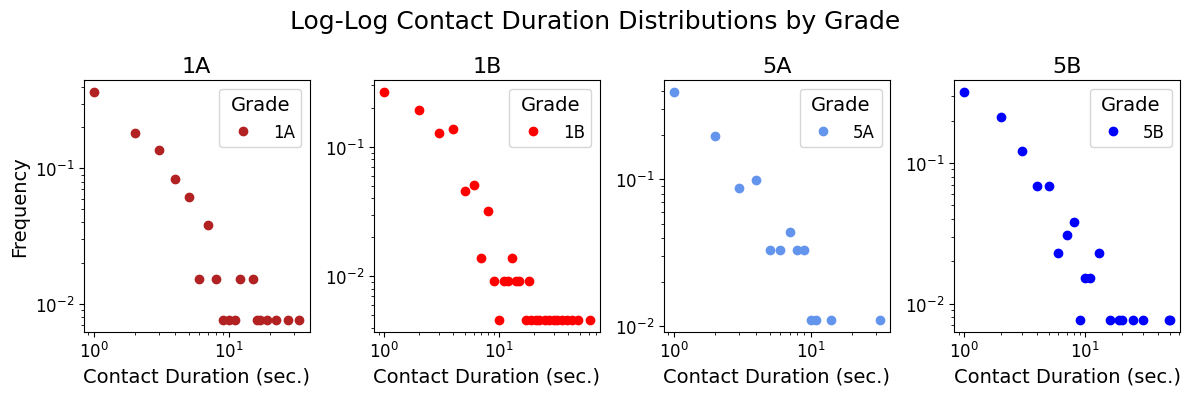

In [100]:
from scipy.stats import entropy

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

# Scatter plot for each grade
fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Increased figure size for better clarity

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    df_filtered = df_filtered.groupby(['u', 'v']).sum().reset_index()

    weights = df_filtered['weight'].value_counts(normalize=True).sort_index()
    ax.loglog(weights.index, weights.values, 'o', label=grade, color=grade_dict_more[grade])
    ax.set_xlabel('Contact Duration (sec.)', fontsize=14)  # Increased font size
    if ax == axes[0]:
        ax.set_ylabel('Frequency', fontsize=14)  # Increased font size
    ax.set_title(f'{grade}', fontsize=16)  # Adjusted subplot title font size
    ax.tick_params(axis='both', which='major', labelsize=12)  # Adjusted tick label sizes
    ax.legend(title='Grade', fontsize=12, title_fontsize=14)  # Adjusted legend font sizes

# Adjust layout and add spacing for readability
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.suptitle('Log-Log Contact Duration Distributions by Grade', fontsize=18)  # Overall title for the subplots
plt.show()


# # Combined scatter plot
# plt.figure(figsize=(12, 8))  # Increased figure size for better visibility

# for grade, nodes in group.items():
#     tmin = time_to_timestamp(first_break[grade])
#     tmax = tmin + 30 * 60  # 30 minutes

#     df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
#     df_filtered = df_filtered.groupby(['u', 'v']).sum().reset_index()

#     weights = df_filtered['weight'].value_counts(normalize=True).sort_index()
#     plt.loglog(weights.index, weights.values*20, 'o', label=grade, color=grade_dict_more[grade])

# # Add axis labels, title, and legend
# plt.xlabel('Contact duration (sec.)', fontsize=16)  # Increased font size for x-axis label
# plt.ylabel('Proportion of Interactions', fontsize=16)  # Increased font size for y-axis label
# plt.title('Contact Duration Distribution Across Grades (Log-Log Scale)', fontsize=18)  # Adjusted title font size
# plt.legend(title='Grade', fontsize=14, title_fontsize=16, loc='upper right')  # Adjusted legend font sizes
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# # Add grid for better readability
# plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)

# # Adjust layout to fit everything nicely
# plt.tight_layout()
# plt.show()



### Power Law?

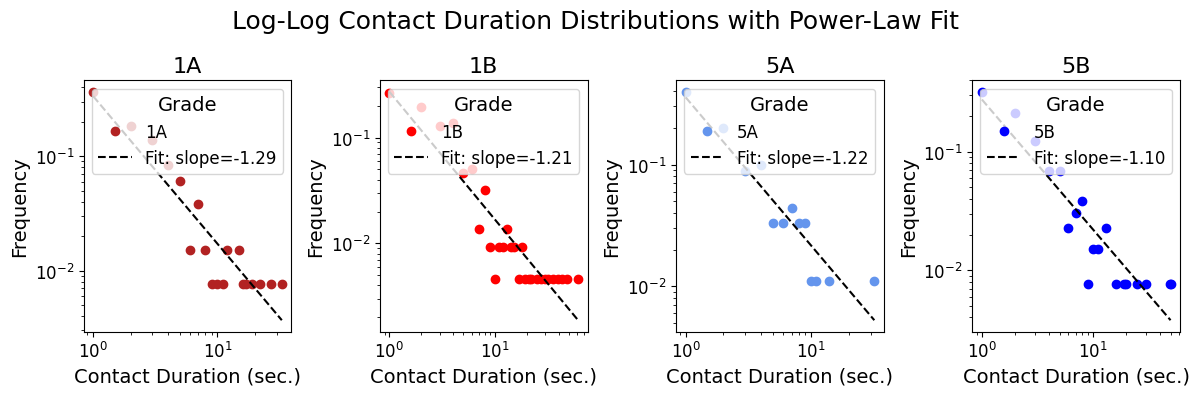

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Increased figure size for better clarity

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    df_filtered = df_filtered.groupby(['u', 'v']).sum().reset_index()

    weights = df_filtered['weight'].value_counts(normalize=True).sort_index()

    # Log-log plot
    x = weights.index
    y = weights.values
    ax.loglog(x, y, 'o', label=grade, color=grade_dict_more[grade])

    # Perform linear fit on log-log scale
    log_x = np.log10(x)
    log_y = np.log10(y)
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    # Plot the linear fit line
    ax.plot(x, 10**(slope * log_x + intercept), label=f'Fit: slope={slope:.2f}', linestyle='--', color='black')

    # Customize labels and titles
    ax.set_xlabel('Contact Duration (sec.)', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.set_title(f'{grade}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(title='Grade', fontsize=12, title_fontsize=14)

# Adjust layout and add spacing for readability
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.suptitle('Log-Log Contact Duration Distributions with Power-Law Fit', fontsize=18)
plt.show()


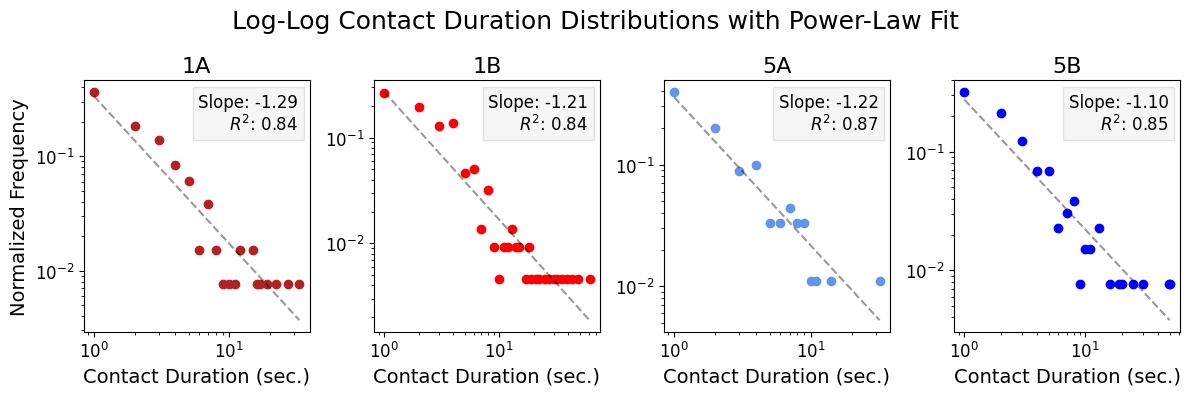

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from matplotlib.lines import Line2D

fig, axes = plt.subplots(1, 4, figsize=(12, 4))  # Increased figure size for better clarity

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    df_filtered = df_filtered.groupby(['u', 'v']).sum().reset_index()

    weights = df_filtered['weight'].value_counts(normalize=True).sort_index()

    # Log-log plot
    x = weights.index
    y = weights.values
    ax.loglog(x, y, 'o', color=grade_dict_more[grade])

    # Perform linear fit on log-log scale
    log_x = np.log10(x)
    log_y = np.log10(y)
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)
    
    # Calculate predicted values
    predicted_log_y = slope * log_x + intercept
    predicted_y = 10**predicted_log_y  # Convert back to original scale

    # Calculate R^2
    r_squared = r_value**2  # Coefficient of determination

    # Plot the linear fit line
    ax.plot(x, predicted_y, linestyle='--', color='black', alpha=0.4)

    # Add the custom legend entry for the fit without showing the line symbol
    # custom_legend_entry = f'Fit: slope={slope:.2f}, \n $R^2$={r_squared:.2f}'
    # ax.legend([custom_legend_entry], fontsize=10, loc='upper right')

    # Add a textbox with slope and R^2
    textstr = f"Slope: {slope:.2f}\n$R^2$: {r_squared:.2f}"
    ax.text(
        0.95, 0.95, textstr,
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        horizontalalignment='right', bbox=dict(facecolor='lightgray', alpha=0.2, edgecolor='gray')
    )

    # Customize labels and titles
    ax.set_xlabel('Contact Duration (sec.)', fontsize=14)
    if ax == axes[0]:
        ax.set_ylabel('Normalized Frequency', fontsize=14)
    #ax.set_ylabel('Normalized Frequency', fontsize=14)
    ax.set_title(f'{grade}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Adjust layout and add spacing for readability
plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.suptitle('Log-Log Contact Duration Distributions with Power-Law Fit', fontsize=18)
plt.show()


(HARD BUT COULD BE INTERESTING) The stranght thing described on page 8 of “Whats in a crowd?”. Basically, its a plot of degree of a node vs. total time spent by the node. We expect to see a non-linear behaviour even though such woud occur in a random network. (Here, references can be added to the results)

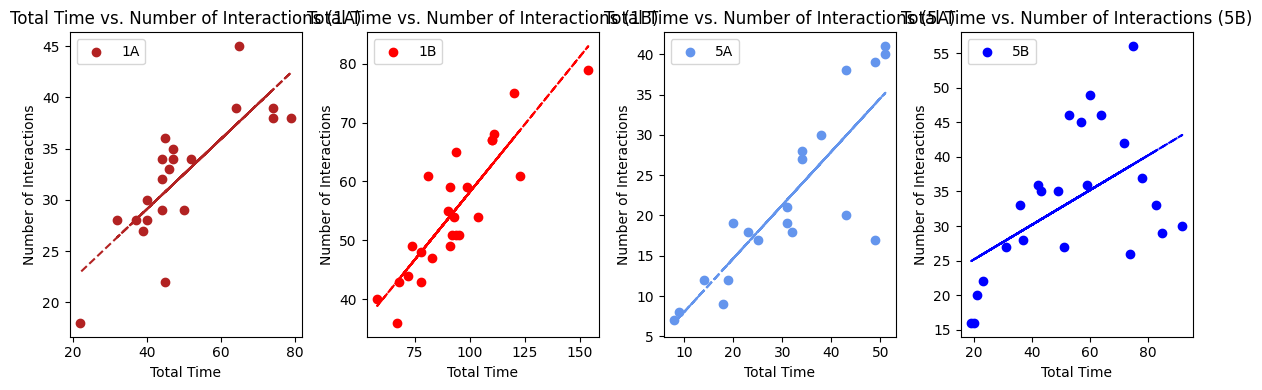

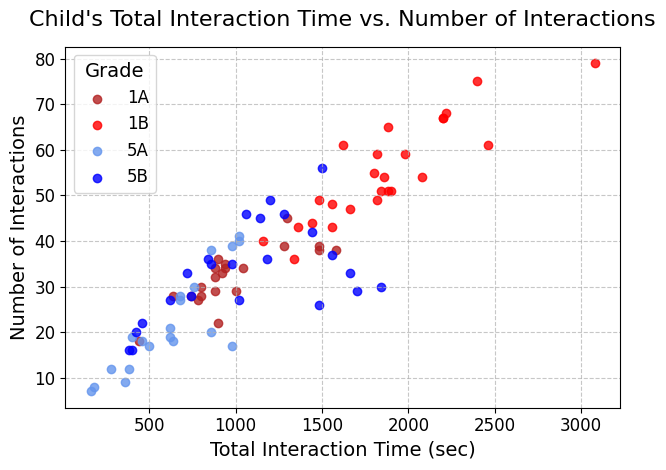

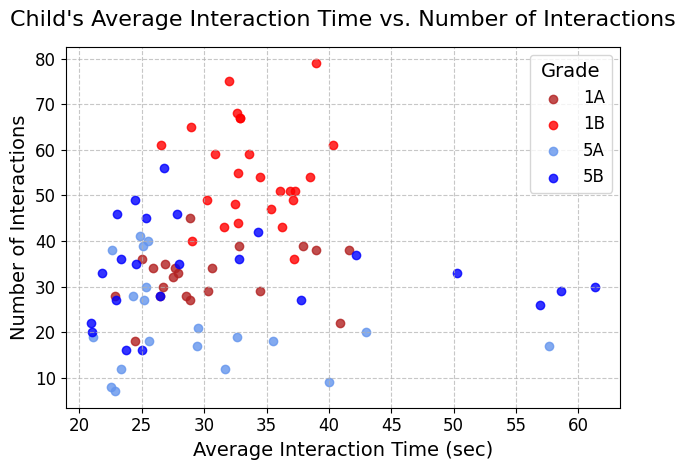

In [17]:
# do a scatterplot for each grade like a 1x4 figure
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}
    total_neighbours = {node: len(set(df_filtered[df_filtered['u'] == node]['v']).union(set(df_filtered[df_filtered['v'] == node]['u']))) for node in nodes}

    # do a scatterplot of total_time vs. number_of_interactions
    ax.scatter(total_time.values(), number_of_interactions.values(), color=grade_dict_more[grade], label=grade)
    ax.set_title(f'Total Time vs. Number of Interactions ({grade})')
    ax.set_xlabel('Total Time')
    ax.set_ylabel('Number of Interactions')
    ax.legend()

    # do a least squares linear fit
    x = np.array(list(total_time.values()))
    y = np.array(list(number_of_interactions.values()))
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color=grade_dict_more[grade], linestyle='--')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    # Filter and process the data
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    # Calculate metrics
    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() * 20 for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}

    # Scatter plot
    plt.scatter(
        total_time.values(),
        number_of_interactions.values(),
        color=grade_dict_more[grade],
        label=grade,
        alpha=0.8
    )

# Customize the plot
plt.title("Child's Total Interaction Time vs. Number of Interactions", fontsize=16, pad=15)
plt.xlabel('Total Interaction Time (sec)', fontsize=14)
plt.ylabel('Number of Interactions', fontsize=14)
plt.legend(title='Grade', fontsize=12, title_fontsize=14, loc='upper left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

    
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30 * 60  # 30 minutes

    # Filter and process the data
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]
    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    # Calculate metrics
    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() * 20 for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}

    # Scatter plot
    plt.scatter(
        [total_time[node]/number_of_interactions[node] for node in total_time.keys()],
        number_of_interactions.values(),
        color=grade_dict_more[grade],
        label=grade,
        alpha=0.8
    )

# Customize the plot
plt.title("Child's Average Interaction Time vs. Number of Interactions", fontsize=16, pad=15)
plt.xlabel('Average Interaction Time (sec)', fontsize=14)
plt.ylabel('Number of Interactions', fontsize=14)
plt.legend(title='Grade', fontsize=12, title_fontsize=14, loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


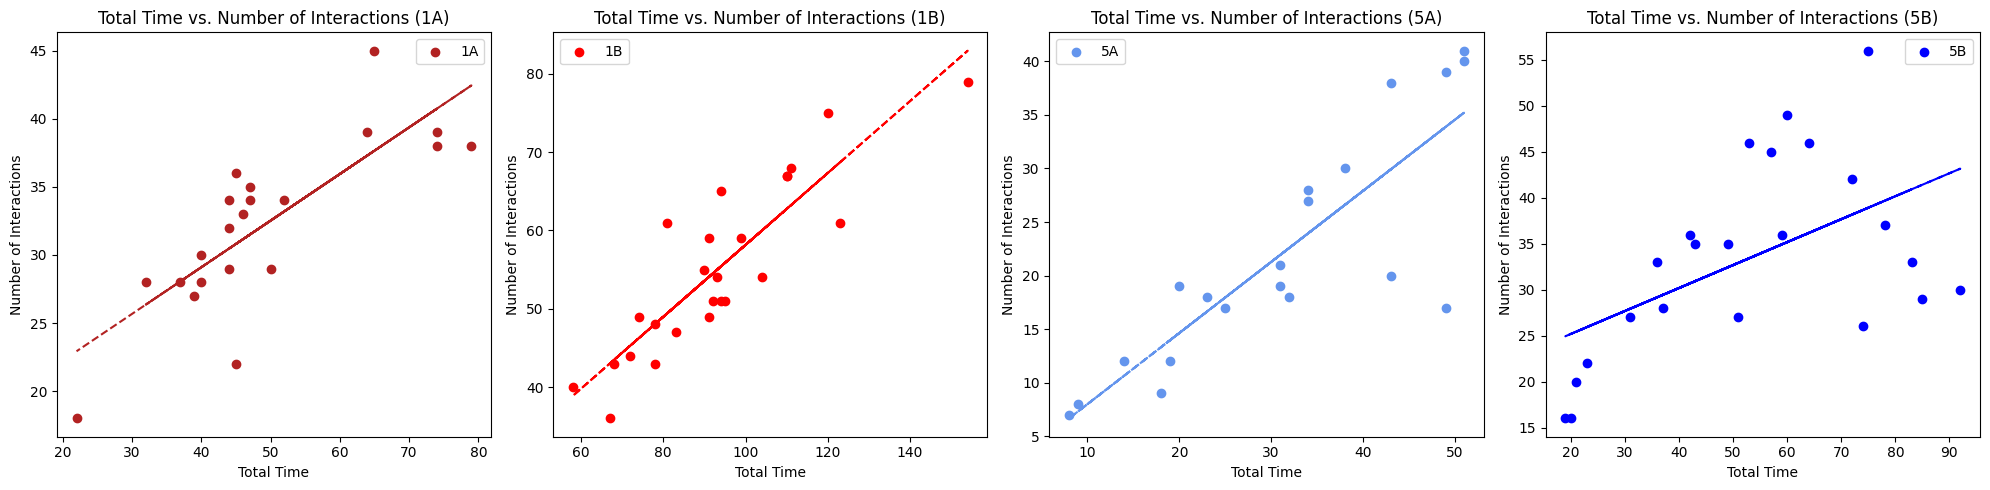

In [28]:
# do a scatterplot for each grade like a 1x4 figure
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, (grade, nodes) in zip(axes, group.items()):
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}
    total_neighbours = {node: len(set(df_filtered[df_filtered['u'] == node]['v']).union(set(df_filtered[df_filtered['v'] == node]['u']))) for node in nodes}

    # do a scatterplot of total_time vs. number_of_interactions
    ax.scatter(total_time.values(), number_of_interactions.values(), color=grade_dict_more[grade], label=grade)
    ax.set_title(f'Total Time vs. Number of Interactions ({grade})')
    ax.set_xlabel('Total Time')
    ax.set_ylabel('Number of Interactions')
    ax.legend()

    # do a least squares linear fit
    x = np.array(list(total_time.values()))
    y = np.array(list(number_of_interactions.values()))
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color=grade_dict_more[grade], linestyle='--')

plt.tight_layout()
plt.show()

# for grade, nodes in group.items():
#     tmin = time_to_timestamp(first_break[grade])
#     tmax = tmin + 30*60 # 10 minutes
   
#     df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

#     nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

#     total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
#     number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}

#     total_neighbours = {node: len(set(df_filtered[df_filtered['u'] == node]['v']).union(set(df_filtered[df_filtered['v'] == node]['u']))) for node in nodes}

#     # do a scatterplot of total_time vs. number_of_interactions
#     plt.scatter(total_time.values(), number_of_interactions.values(), color=grade_dict_more[grade], label=grade)
#     plt.title('Total Time vs. Number of Interactions')

    



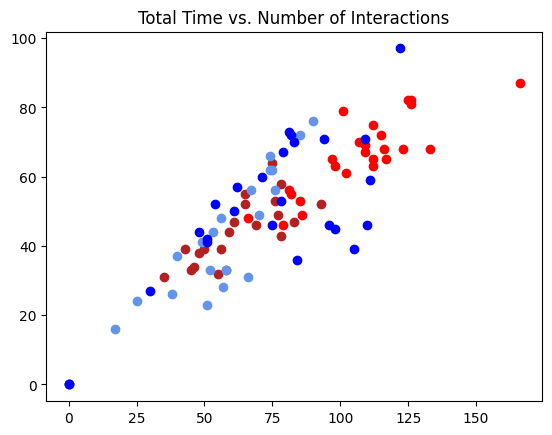

In [29]:
## all interactions, not only within the same group

for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['time'] >= tmin) & (df['time'] <= tmax)]

    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}
    total_neighbours = {node: len(set(df_filtered[df_filtered['u'] == node]['v']).union(set(df_filtered[df_filtered['v'] == node]['u']))) for node in nodes}

    # do a scatterplot of total_time vs. number_of_interactions
    plt.scatter(total_time.values(), number_of_interactions.values(), color=grade_dict_more[grade], label=grade)
    plt.title('Total Time vs. Number of Interactions')

    


Now, sort them by degree? So like what would be the predicted interaction time based on degree, but we use frequency instead of a degree?

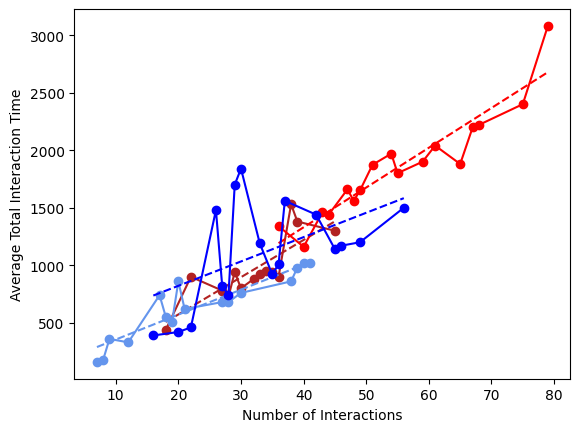

In [30]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}
    
    result = {i: [] for i in number_of_interactions.values()}
    for node in nodes:
        result[number_of_interactions[node]].append(total_time[node])
    
    for k in result.keys():
        result[k] = np.mean(result[k])*20
    
    # I want the result.keys() to be sorted
    result = {k: result[k] for k in sorted(result.keys())}
    
    # do a lineplot of the average total_time vs. number_of_interactions
    plt.plot(result.keys(), result.values(), color=grade_dict_more[grade], label=grade, marker='o')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Average Total Interaction Time')

    # do a least squares linear fit
    x = np.array(list(result.keys()))
    y = np.array(list(result.values()))
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=grade_dict_more[grade], linestyle='--')


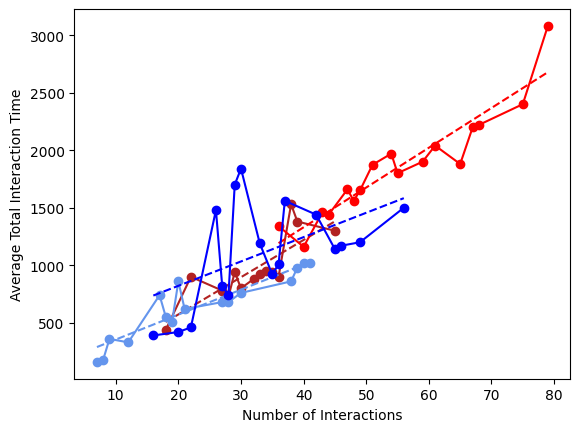

In [31]:
for grade, nodes in group.items():
    tmin = time_to_timestamp(first_break[grade])
    tmax = tmin + 30*60 # 10 minutes
   
    df_filtered = df[(df['u'].isin(nodes)) & (df['v'].isin(nodes)) & (df['time'] >= tmin) & (df['time'] <= tmax)]

    nodes = set(df_filtered['u'].unique()).union(set(df_filtered['v'].unique()))

    total_time = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].sum() for node in nodes}
    number_of_interactions = {node: df_filtered[(df_filtered['u'] == node) | (df_filtered['v'] == node)]['weight'].count() for node in nodes}
    
    result = {i: [] for i in number_of_interactions.values()}
    for node in nodes:
        result[number_of_interactions[node]].append(total_time[node])
    
    for k in result.keys():
        result[k] = np.mean(result[k])*20
    
    # I want the result.keys() to be sorted
    result = {k: result[k] for k in sorted(result.keys())}
    
    # do a lineplot of the average total_time vs. number_of_interactions
    plt.plot(result.keys(), result.values(), color=grade_dict_more[grade], label=grade, marker='o')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Average Total Interaction Time')

    # do a least squares linear fit
    x = np.array(list(result.keys()))
    y = np.array(list(result.values()))
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=grade_dict_more[grade], linestyle='--')


## Utils

In [10]:
def timestamp_to_time(timestamp):

    is_day_2 = (timestamp > 117000)
    # Convert timestamp to seconds since start of the day
    seconds_since_start = (timestamp - (117240 if is_day_2 else d1_min))

    # Calculate hours, minutes, and seconds
    hours = 8 + (seconds_since_start // 3600)
    minutes = (30 if is_day_2 else 45) + ((seconds_since_start % 3600) // 60)
    seconds = seconds_since_start % 60
    # Adjust for overflow in minutes
    if minutes >= 60:
        hours += 1
        minutes -= 60
    return f"{int(hours):02}:{int(minutes):02}:{int(seconds):02}"

def time_to_timestamp(time_str, day=1):
    # Parse the time string
    hours, minutes, seconds = map(int, time_str.split(':'))
    # Calculate total seconds since start of the day
    total_seconds = (hours - 8) * 3600 + (minutes - 45) * 60 + seconds
    # Convert to timestamp
    timestamp = (d1_min if day==1 else 117240) + total_seconds
    return timestamp

In [11]:
def draw_graph_per_community(G, pos, node_colors, communities):
    fig, axes = plt.subplots(1, len(communities), figsize=(4*len(communities), 4))
    print(len(communities))
    if len(communities) == 1:
        axes = [axes]  # Ensure axes is iterable

    for ax, community in zip(axes, communities):
        subgraph = G.subgraph(community)
        nx.draw(subgraph, pos, ax=ax, node_color=[grade_dict_more[node_grade[node]]for node in community], with_labels=True, node_size=100, edge_color='gray')
        ax.set_title(f"Community {communities.index(community) + 1}")

    plt.show()

In [12]:
from collections import defaultdict
import numpy as np

def preprocess_temporal_adjacency(df):
    """Preprocess to create a dictionary of adjacency lists by time."""
    temporal_adj = defaultdict(lambda: defaultdict(list))
    for _, row in df.iterrows():
        temporal_adj[row['time']][row['u']].append(row['v'])
        temporal_adj[row['time']][row['v']].append(row['u'])
    return temporal_adj

def temporal_distance_optimized(temporal_adj, G, source, tmin, tmax, h):
    """
    Optimized temporal distance calculation.
    """
    # Initialize D, T, and R
    D = {node: float('inf') for node in G.nodes()}  # Distance
    T = {node: float('inf') for node in G.nodes()}  # First time of reachability
    R = {node: False for node in G.nodes()}  # Reachable

    D[source] = 0
    T[source] = 0
    R[source] = True

    # Iterate over time windows
    for t in range(tmin, tmax + 1, 20):
        stack = [(node, 0) for node in G.nodes() if R[node]]

        while stack:
            node, depth = stack.pop()
            if depth < h:
                neighbors_t = temporal_adj[t].get(node, [])
                for neighbor in neighbors_t:
                    if not R[neighbor]:
                        R[neighbor] = True
                        T[neighbor] = (t - tmin) / 20
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))
                    elif T[neighbor] == (t - tmin) / 20 and D[neighbor] > D[node] + 1:
                        D[neighbor] = D[node] + 1
                        stack.append((neighbor, depth + 1))

    return T, D

# # Example usage with preprocessing
# tmin = df['time'].min()
# tmax = tmin + 20 * 180
# h = 3  # Horizon


def run_temporal_distance_analysis(tmin_dict, tmax_dict, h):
    results = []

    for grade, nodes in group.items():
        subgraph = G.subgraph(nodes)
        df_group = df_original[df_original['u'].isin(nodes) & df_original['v'].isin(nodes)]
        temporal_adj = preprocess_temporal_adjacency(df_group)

        # Filter nodes that appear at least once in the given timeframe
        nodes_in_timeframe = set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['u']).union(
            set(df_group[(df_group['time'] >= tmin_dict[grade]) & (df_group['time'] <= tmax_dict[grade])]['v'])
        )
        nodes = list(nodes_in_timeframe)

        T = np.zeros((len(nodes), len(nodes)))
        D = np.zeros((len(nodes), len(nodes)))

        tmin = tmin_dict[grade]
        tmax = tmax_dict[grade]

        for node_id, source in enumerate(nodes):
            temporal_distances, node_distances = temporal_distance_optimized(
                temporal_adj, subgraph, source, tmin, tmax, h
            )
            T[node_id, :] = [temporal_distances[node] for node in nodes]
            D[node_id, :] = [node_distances[node] for node in nodes]

        inf_temporal = np.sum(np.isinf(T))
        inf_node = np.sum(np.isinf(D))

        avg_temporal = np.sum(T[np.isfinite(T)]) / (T.size - inf_temporal)
        avg_node = np.sum(D[np.isfinite(D)]) / (D.size - inf_node)
        results.append({
            'grade': grade,
            'inf_temporal': inf_temporal,
            'inf_node': inf_node,
            'avg_temporal': avg_temporal,
            'avg_node': avg_node,
            'efficiency': np.sum(1/T[np.isfinite(T)]),
            'T_matrix': T,
            'D_matrix': D
        })

    return results

# # Example usage with preprocessing
# tmin_dict = {'1A': 36020, '1B': 36020, '5A': 36020, '5B': 36020}
# tmax_dict = {'1A': d1_max, '1B': d1_max, '5A': d1_max, '5B': d1_max}
# h = 3  # Horizon

# all_results = []
# bin_size = 1800  # 30 minutes in seconds

# for increase in range(0, tmax_dict['1A']-tmin_dict['1A'], bin_size):

#     tmin_dict_here = {x: d1_min + increase for x in group.keys()}
#     tmax_dict_here = {x: d1_min + 30*60 + increase for x in group.keys()}

#     results = run_temporal_distance_analysis(tmin_dict_here, tmax_dict_here, h)
#     all_results.extend(results)
#     print(f'time {d1_min + increase} done.')



# # Convert results to a DataFrame for easier plotting
# results_df = pd.DataFrame(all_results)

# # Make a scatterplot of the results
# import matplotlib.pyplot as plt

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# for grade in results_df['grade'].unique():
#     subset = results_df[results_df['grade'] == grade]
#     plt.scatter(subset['avg_temporal'], subset['inf_temporal'], label=grade)

# plt.xlabel('Average Temporal Distance')
# plt.ylabel('Number of Infinite Temporal Distances')
# plt.title('Scatter plot of Average Temporal Distance vs Number of Infinite Temporal Distances')
# plt.legend(title='Grade')
# plt.show()

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# for grade in results_df['grade'].unique():
#     subset = results_df[results_df['grade'] == grade]
#     plt.scatter(subset['avg_node'], subset['inf_node'], label=grade)

# plt.xlabel('Average Node-Temporal Distance')
# plt.ylabel('Number of Infinite Node-Temporal Distances')
# plt.title('Scatter plot of Average Temporal Distance vs Number of Infinite Temporal Distances')
# plt.legend(title='Grade')
# plt.show()
